# Introduction



> Product analytics is a way to draw insights from data on how customers engage and interact with products offered, how different products perform, and what some of the observable weaknesses and strengths in a business are.

Some of the common goals with product analytics are as follows:
- Improve customer and product retention
- Identify popular and trending products
- Segment customers and products based on their key attributes
- Develop marketing strategies with higher ROI


# Exercise

For this exercise, we will be using one of the publicly available datasets from the UCI Machine Learning Repository, which can be found using this link: http://archive.ics.uci.edu/ml/datasets/online+retail#. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/Online Retail.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

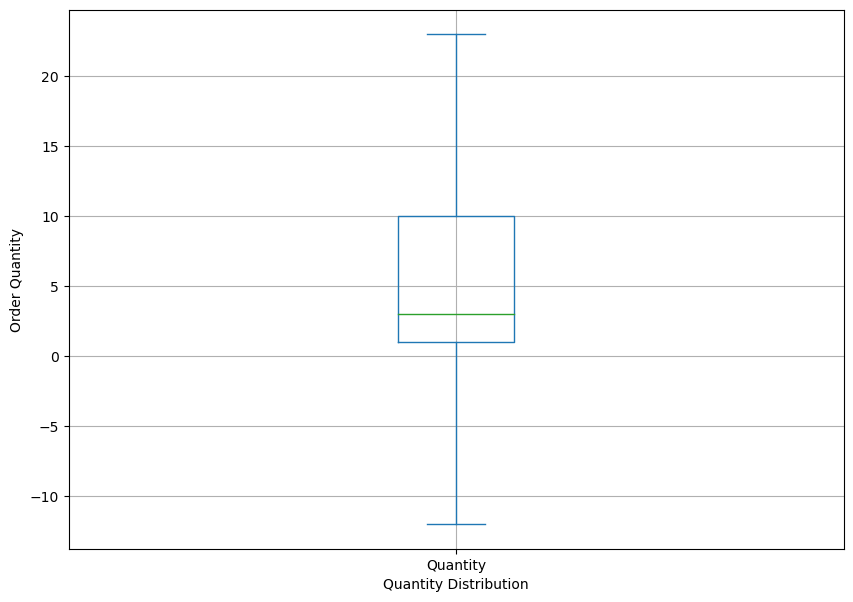

In [4]:
ax = df['Quantity'].plot.box(showfliers=False, grid=True, figsize=(10, 7))

ax.set_ylabel('Order Quantity')
ax.set_xlabel('Quantity Distribution')

plt.suptitle('')
plt.show()

NOTE:
As you can see from this plot, some orders have negative quantities. This is because the cancelled or refunded orders are recorded with negative values in the Quantity column of our dataset.

In [7]:
# Filter out all the cancelled orders

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.loc[df['Quantity'] > 0]

**Time Series Trends**


In [8]:
monthly_orders = df.set_index('InvoiceDate').resample('M').nunique()['InvoiceNo']

monthly_orders

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

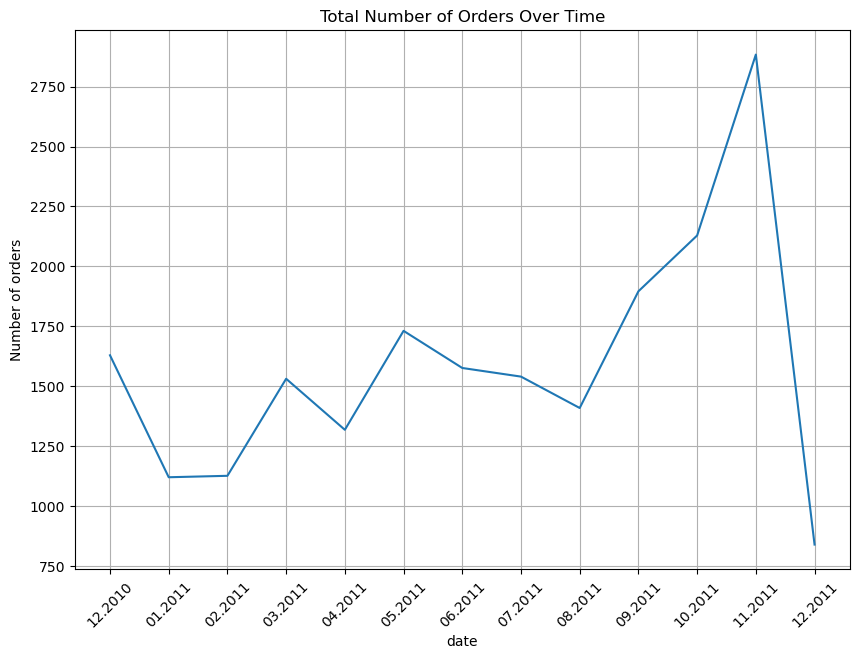

In [14]:
ax = pd.DataFrame(monthly_orders.values)\
        .plot(grid=True, figsize=(10, 7), legend=False)

ax.set_xlabel('date')
ax.set_ylabel('Number of orders')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders.index], 
    rotation=45
)

plt.show()

In [15]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [20]:
# Filter only finished period
df = df.loc[df['InvoiceDate'] < '2011-12-01']

monthly_orders = df.set_index('InvoiceDate').resample('M').nunique()['InvoiceNo']

monthly_orders

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

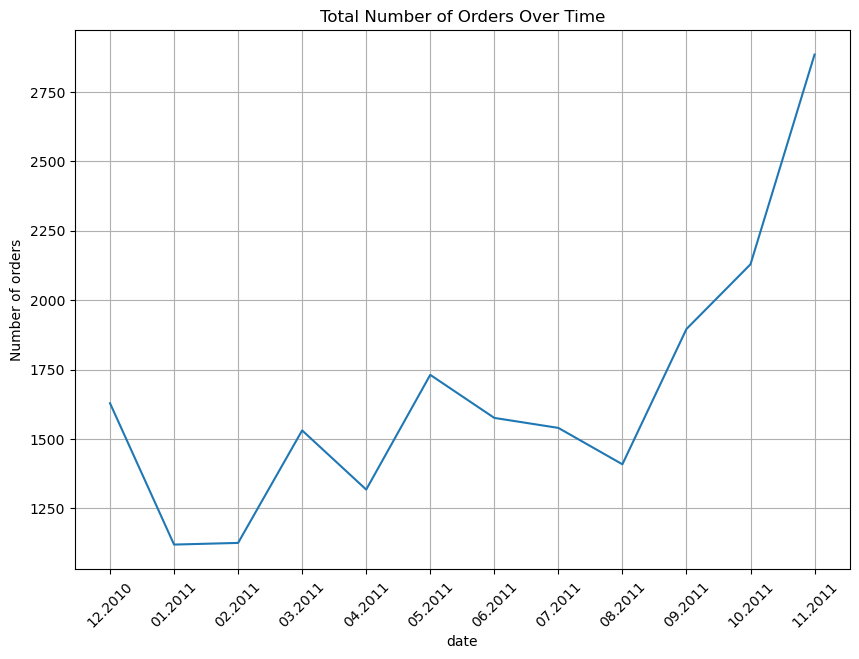

In [21]:
ax = pd.DataFrame(monthly_orders.values)\
        .plot(grid=True, figsize=(10, 7), legend=False)

ax.set_xlabel('date')
ax.set_ylabel('Number of orders')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders.index], 
    rotation=45
)

plt.show()

NOTES:
- The monthly number of orders seems to float around 1500 from December 2010 to August 2011, and then increases significantly from September 2011, and almost doubles by November 2011.
- The one explanation for this could be that the business is actually growing significantly from September 2011.
- Another explanation could be seasonal effects.
- In e-commerce businesses, it is not rare to see spikes in sales as it approaches the end of the year.
- Typically, sales rise significantly from October to January for many e-commerce businesses, and without the data from the previous year, it is difficult to conclude whether this spike in sales is due to a growth in business or due to seasonal effects..
- When you are analyzing your data, we advise you to compare the current year's data against the previous year's data.

In [56]:
# Total revenue
df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue = df.set_index('InvoiceDate')\
                    .resample('M')\
                    .agg({'Sales': sum})['Sales']
monthly_revenue

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

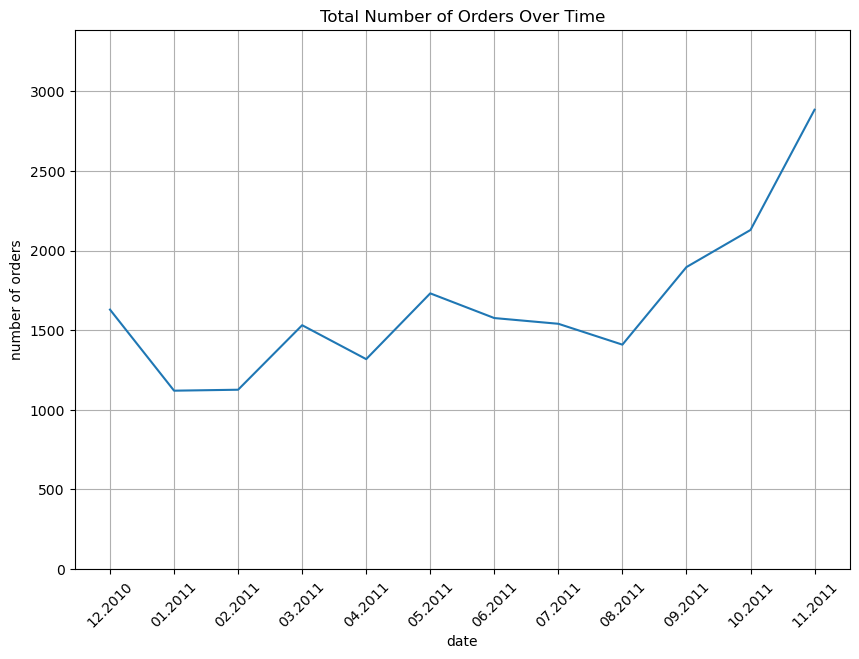

In [24]:
ax = pd.DataFrame(monthly_orders.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders.values)+500])

plt.xticks(
    range(len(monthly_orders.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders.index], 
    rotation=45
)

plt.show()

NOTES:
- The monthly revenue floats around 700,000 from December 2010 to August 2011 and then it increases significantly from September 2011.
- It is generally a good idea to start with broader analyses, and then drill down into more granular and specific parts of the business for further product analytics.

In [25]:
# Repeat Customers
#   It means a customer placed more than one order 
#   within a given month.

invoice_customer = df.groupby(['InvoiceNo', 'InvoiceDate'])\
                    .agg({'Sales': sum,
                         'CustomerID': max,
                         'Country': max,})\
                    .reset_index()
invoice_customer.head()

InvoiceNo         InvoiceDate   Sales  CustomerID         Country
0    536365 2010-12-01 08:26:00  139.12     17850.0  United Kingdom
1    536366 2010-12-01 08:28:00   22.20     17850.0  United Kingdom
2    536367 2010-12-01 08:34:00  278.73     13047.0  United Kingdom
3    536368 2010-12-01 08:34:00   70.05     13047.0  United Kingdom
4    536369 2010-12-01 08:35:00   17.85     13047.0  United Kingdom

In [43]:
monthly_repeat_customers = invoice_customer\
                            .set_index('InvoiceDate')\
                            .groupby([pd.Grouper(freq='M'), 'CustomerID'])\
                            .filter(lambda x: len(x) > 1)\
                            .resample('M')\
                            .nunique()['CustomerID']
monthly_repeat_customers

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [44]:
monthly_unique_customers = df.set_index('InvoiceDate')['CustomerID']\
                            .resample('M')\
                            .nunique()

monthly_unique_customers

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [45]:
monthly_repeat_percentage = monthly_repeat_customers / monthly_unique_customers * 100
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

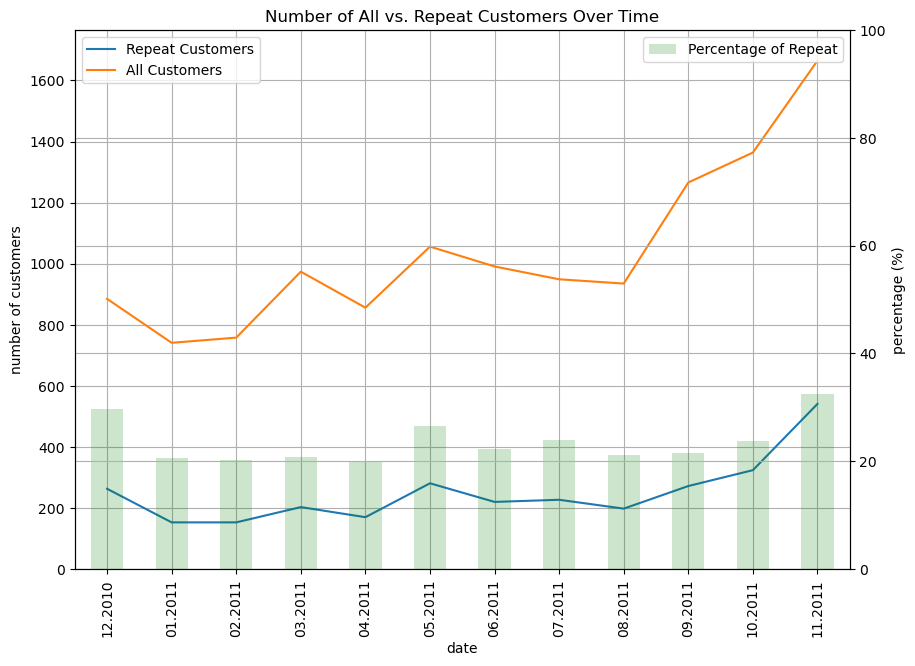

In [46]:
ax = pd.DataFrame(monthly_repeat_customers.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers.index], 
    rotation=45
)

plt.show()

In [57]:
# Revenue from Repeat Customers
monthly_rev_repeat_customers = invoice_customer\
                                .set_index('InvoiceDate')\
                                .groupby([pd.Grouper(freq='M'), 'CustomerID'])\
                                .filter(lambda x: len(x) > 1)\
                                .resample('M')\
                                .agg({'Sales': sum})['Sales']
monthly_rev_repeat_customers

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

In [60]:
monthly_rev_perc_repeat_customers = (monthly_rev_repeat_customers / monthly_revenue) * 100.0
monthly_rev_perc_repeat_customers

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

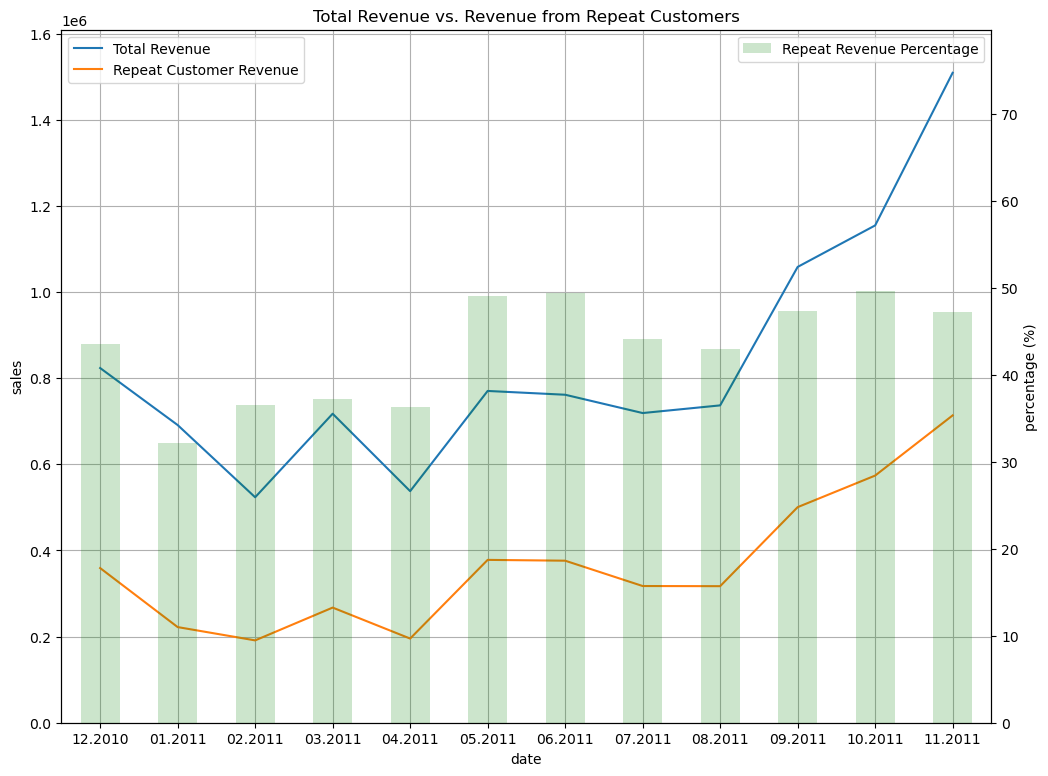

In [61]:
ax = pd.DataFrame(monthly_revenue.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers.index
])

plt.show()

NOTES:
- There is a significant increase in the revenue from September 2011.
-  We have seen that roughly 20-30% of the customers who made purchases are repeat customers. However, in this graph, we can see that roughly 40-50% of the Total Revenue is from repeat customers.
- Roughly half of the revenue was driven by the 20-30% of the customer base who are repeat customers. This shows how important it is to retain existing customers.

In [63]:
# Trending items over time
date_item = df.set_index('InvoiceDate')\
            .groupby([pd.Grouper(freq='M'), 'StockCode'])\
            .agg({'Quantity': sum})

date_item

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10123C            1
            10124A            4
            10124G            5
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [65]:
# Rank items by the last month sales
last_month_sorted = date_item.loc['2011-11-30']\
                    .sort_values(by='Quantity', ascending=False)\
                    .reset_index()

last_month_sorted.head()

StockCode  Quantity
0     23084     14954
1     84826     12551
2     22197     12460
3     22086      7908
4    85099B      5909

In [72]:
# Regroup for top 5 items
date_item = pd.DataFrame(
    df.loc[
        df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [74]:
# table = pd.pivot_table(df, values ='A', index =['B', 'C'],
#                          columns =['B'], aggfunc = np.sum)



pivot_trending_items = date_item.reset_index().pivot(values='Quantity', 
                                                     columns=['StockCode'], 
                                                     index=['InvoiceDate'])\
                        .fillna(0.0)
pivot_trending_items

StockCode     22086    22197    23084    84826  85099B
InvoiceDate                                           
2010-12-31   2460.0   2738.0      0.0    366.0  2152.0
2011-01-31     24.0   1824.0      0.0    480.0  2747.0
2011-02-28      5.0   2666.0      0.0     66.0  3080.0
2011-03-31     87.0   2803.0      0.0     60.0  5282.0
2011-04-30     13.0   1869.0      0.0      1.0  2456.0
2011-05-31     17.0   6849.0   1131.0      0.0  3621.0
2011-06-30    344.0   2095.0   1713.0      4.0  3682.0
2011-07-31    383.0   1876.0    318.0      2.0  3129.0
2011-08-31    490.0   5421.0   2267.0     72.0  5502.0
2011-09-30   2106.0   4196.0    680.0      0.0  4401.0
2011-10-31   3429.0   5907.0   6348.0     11.0  5412.0
2011-11-30   7908.0  12460.0  14954.0  12551.0  5909.0

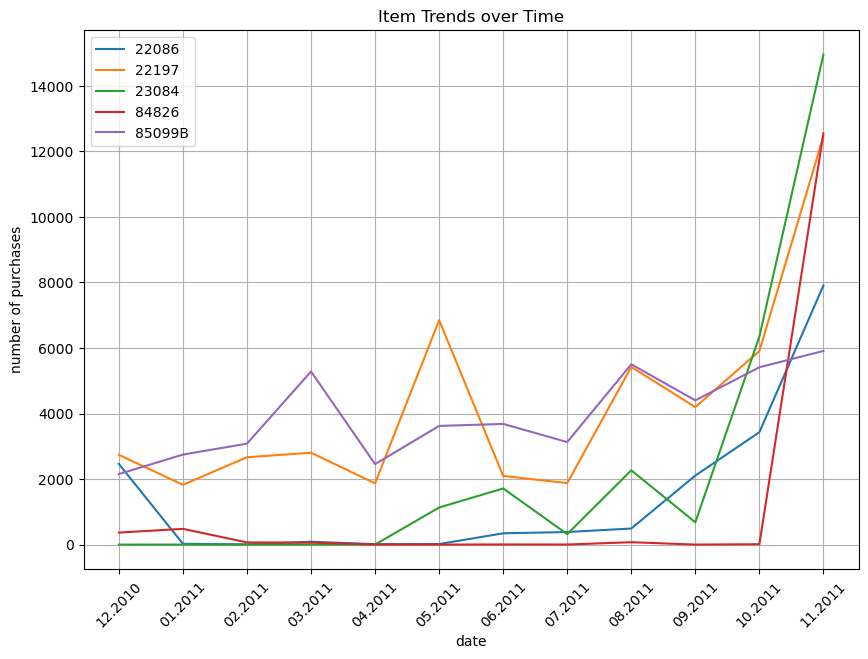

In [75]:
ax = pd.DataFrame(pivot_trending_items.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(pivot_trending_items.columns, loc='upper left')

plt.xticks(
    range(len(pivot_trending_items.index)), 
    [x.strftime('%m.%Y') for x in pivot_trending_items.index], 
    rotation=45
)

plt.show()

Notes:
- The sales of these five products spiked in November 2011, especially the sales of the product with stock code, 85099B, which were close to 0 from February 2011 to October 2011.

- It might be worth taking a closer look into what might have driven this spike.

(It could be an item that is highly sensitive to seasonality, becoming very popular during November, or it could also be that there was a genuine change in trends, which led to this item becoming more popular than before).

- As a marketer, it would also be worthwhile taking a closer look at the potential drivers behind this buildup and the rising popularity of these items. 

-  As your customers are more interested and more likely to purchase these items, you might get higher marketing engagement from your customers when you market these items more, and you might eventually get higher conversion rates when you target your customers with these trending items.

- Using these popular and trending items is one way to build a product recommendation engine.
